<a href="https://colab.research.google.com/github/mrobayoba/Accel_DataAnalyzer/blob/main/Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 1 - práctica
### Integrantes
>Obeimar José Benavides Zabala

>Mateo Robayo Barrera

In [ ]:
# For installing necessary libraries in a Jupyter notebook environment
# %pip install --upgrade pip
# %pip install numpy pandas scikit-learn matplotlib

In [ ]:
import numpy as np
# import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### PARTE I: EXPLORACIÓN DEL CONJUNTO DE DATOS (20 puntos)

In [ ]:
dataset = fetch_california_housing()
X = dataset.data
y = dataset.target

feature_names = dataset.feature_names
print("Dataset description:")
print(dataset.DESCR[:1500])
print("\nFeature names:", feature_names)
target_name = dataset.target_names
print("\nTarget name:", target_name)

Dataset description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census,

1. Ejecute el código anterior e identifique cuántas observaciones (n) y cuántas características tiene el dataset. *(3 puntos)*

- Número de instancias/observaciones (n) = 20640
- Número de carácteristicas = 8

    A. ¿Cuál es el valor de n (número de registros)? *(1 pts)*

- n = 20640

    B. ¿Cuántas características tiene cada observación? *(1 pts)*

- Cada observación o registro cuenta con el mismo número de características(attributes) igual a 8

    C. Según la notación del capítulo, escriba el vector de características x para la primera observación del dataset en forma de columna. *(1 pts)*

In [ ]:
# First instance of the dataset
print("First instance of the dataset:")
print(X[0].reshape(-1, 1))

First instance of the dataset:
[[   8.3252    ]
 [  41.        ]
 [   6.98412698]
 [   1.02380952]
 [ 322.        ]
 [   2.55555556]
 [  37.88      ]
 [-122.23      ]]


2. Liste las 8 características del dataset y explique brevemente qué representa cada una. *(4 puntos)*

- **MedInc**: mediana del valor de renta en el bloque
- **HouseAge**: mediana de edades de las casas en el bloque
- **AveRooms**: número promedio de habitaciones por famila
- **AveBedrms**: número promedio de dormitorios por familia
- **Population**: población del bloque
- **AveOccup**: número promedio de integrantes de familia
- **Latitude**: latitud del bloque
- **Longitude**: longitud del bloque

**El "bloque" se refiere al conjunto de casas contiguas en las que se agrupan todas las muestras tomadas para el dataset**

3. ¿Qué variable estamos tratando de predecir (etiqueta y)? ¿Qué unidades tiene? *(2 puntos)*

**MedHouseVal**, mediana del valor por casa en los distritos de California, sus unidades son cientos de miles de dolares, cada valor se multiplica por 100000.

4. Según la taxonomía del capítulo, ¿este problema es de regresión o clasificación? Justifique su respuesta explicando por qué la variable objetivo corresponde a una u otra categoría. *(3 puntos)*

Corresponde a un problema de regresión pues no se está dividiendo el objetivo (MedInc) en casos sino que se trata de predecir su valor numérico.

5. Normalización de datos: *(8 puntos)*
El preprocesamiento es crucial para el entrenamiento estable de redes neuronales.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization using StandardScaler, this ensures an stable gradient descent during training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit and transform the training data
X_test_scaled = scaler.transform(X_test) # Transform the test data using the same scaler

print("First instance of the scaled training data:")
print(X_train_scaled[0].reshape(-1, 1))

First instance of the scaled training data:
[[-0.326196  ]
 [ 0.34849025]
 [-0.17491646]
 [-0.20836543]
 [ 0.76827628]
 [ 0.05137609]
 [-1.3728112 ]
 [ 1.27258656]]


d. ¿Por qué es importante normalizar las características antes de entrenar una red neuronal? Relacione su respuesta con el proceso de descenso del gradiente. *(3 pts)*

    La diferencia de escala de las caracteísticas puede causar fallas o demoras en la convergencia debido a que algunás características operan en rangos pequeños, como el promedio de integrantes por familia, y otras en rangos muy amplios, como la edad del bloque o la población del bloque. Al normalizar todas las características se logra que todos los rangos estén restringidos lo que permite encontrar rápidamente el descenso del gradiente y evita que existan errores amplificados debido a las diferencias de escala. Además esto permite que la influencia que tienen las características sobre el modelo se restringa a sus pesos "w" y no al valor de las características, lo que evita picos exagerados en la superficie permitiendo reducir el número de pasos para el cálculo del gradiente.

e. ¿Qué hace exactamente StandardScaler? Escriba la fórmula matemática de la transformación. *(2 pts)*

    Este módulo de python permite ajustar los datos para el entrenamiento del modelo, del percentrón en este caso. El método *fit_transform* realiza el cálculo la media y la desviación estandar de cada caracterísica para luego aplicar la siguiente regla de transformación:
    $$ x' = \frac{x-\mu}{\sigma} $$

    Esto restringe las características a tener siempre una media de 0 y una desviación estandar de 1 haciendo que todas las caracteristicas sean comparables entre sí.

    El método *transform* aplica la regla de transformación anterior con el ajuste (media y desviación estandar) calculado con el método anterior.

f. ¿Por qué usamos fit\_transform en el conjunto de entrenamiento pero solo transform en el de prueba? *(3 pts)*

    El método *fit_transform* es en realidad la combinación de 2 operaciones:
    - ***fit***, calcula y almacena la media $\mu$ y desviación estandar $\sigma$ de los datos en el conjunto de características.
    - ***transform***, calcula y retorna el valor de la transformación
    $$ x' = \frac{x-\mu}{\sigma} $$
    que depende de la media $\mu$ y la desviación estandar $\sigma$ calculadas y guardadas en la operación anterior.

    El método *transform* hace uso los valores $\mu$ y $\sigma$ almacenados al utilizar primero el método anterior.
    Esto mantiene la generalidad de las predicciones basandose en el conjunto de entrenamiento (donde se aplica *fit_transform*).

#### Parte II

Ahora implementará la estructura básica de un perceptrón para regresión, conectando cada
componente con la teoría del capítulo.

6. Implemente la función de inicialización de pesos y sesgo: (6 puntos)

g. Complete la función. ¿Por qué es conveniente inicializar los pesos con valores
aleatorios pequeños en lugar de ceros? (3 pts)

    Si inicializas todos los pesos en cero, el modelo empieza “simétrico” y las actualizaciones del gradiente tienden a comportarse igual para todos los pesos (en redes con más de una neurona es crítico porque todas aprenderían lo mismo). Inicializar con valores aleatorios pequeños rompe esa simetría y evita que el entrenamiento se “atasque” o aprenda de forma degenerada. Además, que sean pequeños evita valores iniciales muy grandes que podrían producir predicciones enormes y gradientes inestables




In [ ]:
import numpy as np

def inicializar_parametros(n_caracteristicas, seed=42):
    """
    Inicializa los pesos y el sesgo del perceptrón.

    Retorna:
    w: (n_caracteristicas, 1)
    b: escalar
    """
    np.random.seed(seed)  # para reproducibilidad
    w = np.random.randn(n_caracteristicas, 1) * 0.01  # valores aleatorios pequeños
    b = 0.0
    return w, b


h. Según la notación del capítulo, ¿qué forma debe tener el vector w? Verifique con print(w.shape) después de llamar a su función. (2 pts)

    Según la notación del capítulo:

    $$
    \mathbf{w} \in \mathbb{R}^{n \times 1}
    $$

    en este dataset:

    $$
    \mathbf{w} \in \mathbb{R}^{8 \times 1}
    $$

In [ ]:
w, b = inicializar_parametros(8)
print("w.shape =", w.shape)
print("b =", b)


w.shape = (8, 1)
b = 0.0


i. ¿Por qué el sesgo b se inicializa típicamente en cero mientras los pesos no? (1 pts)

    Porque b solo desplaza la recta/hiperplano (intercepto) y no causa problemas de simetría, ahora, empezar con b=0 es estándar y suficiente. En cambio, w define la dirección del hiperplano y conviene iniciarlo con pequeños valores aleatorios para arrancar con una dirección no degenerada.

7. Implementación de la suma ponderada (propagación hacia adelante): (10 puntos)
Recuerde la ecuación fundamental: z = w^T x + b

In [ ]:
def propagacion_adelante(X, w, b):
    """
    X: (m, n)
    w: (n, 1)
    b: escalar

    Retorna:
    y_pred: (m, 1)
    """
    y_pred = X @ w + b
    return y_pred


1. Complete la función. Explique por qué usamos X @ w en lugar de w^T @ X cuando X tiene forma (m, n). (3 pts)

    X tiene forma $(m,n)$ $w$ tiene forma $(n,1)$

    Entonces:

    $$
    Xw : (m,n)\cdot(n,1) = (m,1)
    $$

    Eso coincide con la salida $\hat{y}$ para $m$ predicciones.

    En cambio: $w^{T}$ tiene forma $(1,n)$ y $X$ tiene forma $(m,n)$

    $$
    w^{T}X : (1,n)\cdot(m,n)
    $$

    Eso no se puede multiplicar porque las dimensiones internas no coinciden $(n \ne m)$.
    Solo podrías hacer:

    $$
    w^{T}X^{T}
    $$

    pero eso sería menos natural aquí.

2. En un problema de regresión como este, ¿qué función de activación se usa? ¿Por qué?
(2 pts)

    Se usa activación lineal (identidad), $\hat{y} = z$, porque queremos predecir un valor continuo (precio) sin restringirlo a $(0,1)$ como la sigmoide o a valores positivos como ReLU.


3. Pruebe su función con los primeros 5 ejemplos del conjunto de entrenamiento.
    Muestre las predicciones iniciales y compárelas con los valores reales. ¿Son buenas
    predicciones? ¿Por qué? (3 pts)

    No, no son buenas predicciones al inicio porque los pesos son aleatorios (muy pequeños) y el modelo aún no ha ajustado la relación entre características y precio. Normalmente las predicciones iniciales estarán cerca de 0 (por pesos pequeños) mientras que y real tiene valores en un rango mayor.

4. Dibuje un diagrama (puede ser a mano y escaneado) mostrando el flujo de datos
desde las 8 características de entrada hasta la salida y_pred, indicando dónde
intervienen w, b y la suma ponderada. (2 pts)

        x1 ──(w1)─┐
        x2 ──(w2)─┤
        x3 ──(w3)─┤
        x4 ──(w4)─┤
        x5 ──(w5)─┤──►  z = Σ (wi*xi) + b  ─► y_pred (activación lineal)
        x6 ──(w6)─┤
        x7 ──(w7)─┤
        x8 ──(w8)─┘




In [ ]:
# Suponiendo que ya tienes X_train_scaled, y_train de la Parte I
w, b = inicializar_parametros(X_train_scaled.shape[1])

y_pred_5 = propagacion_adelante(X_train_scaled[:5], w, b)
y_real_5 = y_train[:5].reshape(-1, 1)

print("Predicciones iniciales (5):\n", y_pred_5)
print("\nValores reales (5):\n", y_real_5)


Predicciones iniciales (5):
 [[-0.02024106]
 [-0.01487816]
 [-0.00950527]
 [-0.02449521]
 [ 0.01001753]]

Valores reales (5):
 [[1.03 ]
 [3.821]
 [1.726]
 [0.934]
 [0.965]]


8. Función de pérdida: (9 puntos)
Para regresión, usaremos el Error Cuadrático Medio (MSE).

1. Complete la función. ¿Por qué elevamos al cuadrado las diferencias en lugar de usar
el valor absoluto? (3 pts)
    * El cuadrado penaliza más fuerte los errores grandes (importante en precios).

    * Hace la función suave y derivable en todo punto.

    * Facilita el descenso del gradiente porque su derivada es simple y estable.


2. Calcule la pérdida inicial (con los pesos aleatorios). Guarde este valor para
compararlo después del entrenamiento. (2 pts)

    La “pérdida inicial” es ese valor numérico. Se guarda para comparar con el final después del entrenamiento.

3. El capítulo menciona que la pérdida MSE tiene su origen en la regresión lineal de
Legendre y Gauss. ¿Qué ventaja tiene el MSE para el descenso del gradiente
comparado con el error absoluto medio (MAE)? (2 pts)

    El MSE es diferenciable en todo punto (su gradiente es continuo). El MAE tiene un “punto no derivable” cuando el error es 0 (el valor absoluto tiene esquina). Por eso el MSE produce gradientes más estables y facilita la optimización con gradiente descendente.

4. ¿Qué significa que la función de pérdida se &quot;estabilice&quot; durante el entrenamiento?
Relacione con el concepto de convergencia. (2 pts)

    Que deja de disminuir de forma significativa entre épocas, indicando que el modelo está cerca de un mínimo (convergencia). En términos de gradiente, significa que $\nabla L$ se hace pequeño y las actualizaciones ya no cambian mucho los parámetros.


In [ ]:
def calcular_perdida(y_pred, y_real):
    """
    y_pred: (m, 1)
    y_real: (m,) o (m,1)
    """
    y_real = y_real.reshape(-1, 1)
    m = y_real.shape[0]
    mse = (1/m) * np.sum((y_pred - y_real)**2)
    return mse

In [ ]:
w, b = inicializar_parametros(X_train_scaled.shape[1])
y_pred_init = propagacion_adelante(X_train_scaled, w, b)

perdida_inicial = calcular_perdida(y_pred_init, y_train)
print("Pérdida inicial (MSE):", perdida_inicial)


Pérdida inicial (MSE): 5.627996741145236


#### PARTE III: RETROPROPAGACIÓN Y GRADIENTE DESCENDENTE (30 puntos)

Esta es la parte central del aprendizaje. Implementará el algoritmo que permite a la red "aprender de sus errores".

9. Cálculo del gradiente: *(12 puntos)*

Para el MSE con activación lineal, derive matemáticamente las expresiones del gradiente.

1. Partiendo de
   $$ L = \frac{1}{m} \sum (\hat{y}_i - y_i)^2 $$
   y
   $$ \hat{y} = Xw + b $$
   , demuestre paso a paso que:
   $$ \frac{\partial L}{\partial w} = \frac{2}{m} X^T (\hat{y} - y) $$
   *(4 pts)*

   **Demostración:**

   - Definimos el error para una muestra $i$ como $e_i = \hat{y}_i - y_i$, con $ \hat{y} = Xw + b $.
   - La función de costo es $L = \frac{1}{m} \sum_{i=1}^m e_i^2$.
   - Aplicamos la regla de la cadena para derivar respecto a $w$:
      $$ \frac{\partial L}{\partial w} = \frac{1}{m} \sum_{i=1}^m \frac{\partial (e_i^2)}{\partial w} $$
      $$ \frac{\partial L}{\partial w} = \frac{1}{m} \sum_{i=1}^m 2 e_i \frac{\partial e_i}{\partial w} $$
      Se observa que solo $e_i$ depende de $w$.

   - Siendo $e_i = (X_i w + b) - y_i$, la derivada de $e_i$ respecto a $w$ es:
      $$ \frac{\partial e_i}{\partial w} = X_i^T $$
   - Sustituimos:
      $$ \frac{\partial L}{\partial w} = \frac{2}{m} \sum_{i=1}^m (\hat{y}_i - y_i) X_i^T $$
   - En notación matricial, la suma de los productos de errores por filas de características es equivalente
   al producto punto de $X$ transpuesto por el vector de errores:
      $$ \frac{\partial L}{\partial w} = \frac{2}{m} X^T (\hat{y} - y) $$

2. Demuestre también que:
   $$ \frac{\partial L}{\partial b} = \frac{2}{m} \sum (\hat{y}_i - y_i) $$
   *(3 pts)*

   **Demostración:**

   - Como en el numeral anterior, aplicamos la regla de la cadena:
      $$ \frac{\partial L}{\partial b} = \frac{1}{m} \sum_{i=1}^m 2 e_i \frac{\partial e_i}{\partial b} $$
   - Derivamos $e_i = (X_i w + b) - y_i$ respecto a $b$:
      $$ \frac{\partial e_i}{\partial b} = 1 $$
   - Sustituimos este valor en la sumatoria:
      $$ \frac{\partial L}{\partial b} = \frac{2}{m} \sum_{i=1}^m (\hat{y}_i - y_i) \cdot 1 $$
      $$ \frac{\partial L}{\partial b} = \frac{2}{m} \sum_{i=1}^m (\hat{y}_i - y_i) $$

3. ¿Por qué el gradiente "señala la dirección de máxima pendiente ascendente"? Explique usando la metáfora de la montaña del capítulo. *(2 pts)*

   En la metáfora nos ilustran la situación de un excursionista que debe subir una montaña envuelta en niebla. Esto hace referencia a que el camino a la cima es desconocido. El excursionista recorre su camino basado en tres reglas.

   - Solo se puede observar los lugares donde se puede realizar el siguiente paso, esto implica que cualquier decisión se basará solo en lo que lo rodea inmediatamente.
   - Como regla general siempre se deben dar pasos del mismo tamaño para poder rastrear el camino.
   - Para optimizar el ascenso se debe avanzar por el camino más inclinado.

   Con estas reglas el excursionista subirá rapidamente a la cima al evaluar si con cada paso regular máximiza la altura alcanzada.

4. ¿Qué significa el signo negativo en la regla de actualización $ w \leftarrow w - \eta \nabla L $? *(3 pts)*

   El signo negativo está asociado al gradiente de la función de perdida $\nabla L$ y significa que el ajuste a los pesos se hace en la dirección opuesta del gradiente logrando así minimizar el error en base a la dirección donde la función de perdida decrece con mayor rapidez, que corresponde justamente a la dirección opuesta del gradiente de dicha función.


10. Implemente la función de cálculo de gradientes: *(8 puntos)*

In [ ]:
def gradient_calculator(X, y_pred, y):
    """
    Calculate the gradient of the loss function with respect to the predictions.

    Parameters
    -----------
    X : array_like
        Array of shape (m, n) containing the input features.
    y_pred : array_like
        Array of shape (m, 1) containing the predicted values.
    y : array_like
        Array of shape (m, 1) containing the true target values.

    Returns
    -----------
    output: tuple
        A tuple containing the gradients of the loss function with respect to the weights and bias.
    """
    # Ensure y and y_pred are column vectors (m, 1)
    y = y.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)

    n_samples = X.shape[0]  # Number of samples

    # Gradient calculation for weights: dw = (2/m) * X.T @ (y_pred - y)
    dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))

    # Gradient calculation for bias: db = (2/m) * sum(y_pred - y)
    db = (2 / n_samples) * np.sum(y_pred - y)

    return dw, db

1. Complete la función siguiendo las fórmulas derivadas en la pregunta anterior. *(4 pts)* Ver el la función **gradient_calculator**

2. Verifique que dw tenga la misma forma que w. ¿Por qué es esto necesario para la actualización? *(2 pts)*

    En la función gradient_calculator el producto punto se hace entre la matriz $X.T$ de tamaño (n, m), por ser la transpuesta de $X$, y el vector $\hat{y}-y$ que es de tamaño (m, 1). Por las propiedades del producto punto su salida será de tamaño (n, 1) que corresponde al número de características del dataset.

3. ¿Qué sucede con los gradientes si todas las predicciones son exactamente iguales a los valores reales? *(2 pts)*

    Si todas las predicciones son exactamente iguales a los valores reales, entonces $\hat{y} - y = 0$ para todas las muestras. En consecuencia, el gradiente respecto a los pesos $dw = \frac{2}{m} X^T (\hat{y} - y) = 0$ y el gradiente respecto al sesgo $db = \frac{2}{m} \sum (\hat{y} - y) = 0$. Esto indica que el modelo ha alcanzado el mínimo global, en este caso especifico (perceptrón lineal), de la función de pérdida (convergencia perfecta), y no se requieren más actualizaciones.


11. Actualización de parámetros: *(10 puntos)*

In [ ]:
def update_parameters(w, b, dw, db, learning_rate):
    """
    Update the weights and bias using gradient descent.
    Parameters
    -----------
    w: Array of shape (n, 1) containing the current weights.
    b: Float representing the current bias.
    dw: Array of shape (n, 1) containing the gradient of the loss function with respect to the weights.
    db: Float representing the gradient of the loss function with respect to the bias.
    learning_rate: Float representing the learning rate for gradient descent.

    Returns
    ----------
    tuple: A tuple containing the updated weights and bias.
    """
    # Ensure gradients have the same shape as parameters before updating
    # In case dw came out as (n,) instead of (n,1), we reshape it to match w
    if dw.shape != w.shape:
        dw = dw.reshape(w.shape)

    w_new = w - learning_rate * dw
    b_new = b - learning_rate * db

    return w_new, b_new

1. Complete la función. *(2 pts)* Ver la función **update_parameters**

2. ¿Qué es la tasa de aprendizaje (learning\_rate o $\eta$)? ¿Qué problemas pueden surgir si es muy grande? ¿Y si es muy pequeña? *(4 pts)*

    El parámetro $\eta$ representa que tan fuerte es el impacto del ajuste sobre los pesos o el bias. Se considera como el tamaño del paso entre cada epoca, o iteración, en el proceso de retroprogramación. Si es muy grande, puede causar oscilaciones o divergencia (el modelo no converge). Si es muy pequeña, el entrenamiento es lento y puede quedar atrapado en mínimos locales o no converger en un tiempo razonable.

3. Ejecute una iteración completa: propagación adelante → cálculo de pérdida → gradientes → actualización. Compare la pérdida antes y después. ¿Disminuyó? *(4 pts)*


In [ ]:
# 1. Inicialización
learning_rate = 0.01
w, b = inicializar_parametros(X_train_scaled.shape[1])

# 2. Propagación adelante (Forward)
y_pred_inicial = propagacion_adelante(X_train_scaled, w, b)

# 3. Cálculo de pérdida inicial
perdida_antes = calcular_perdida(y_pred_inicial, y_train)
print(f"Pérdida inicial: {perdida_antes}")

# 4. Cálculo de gradientes
dw, db = gradient_calculator(X_train_scaled, y_pred_inicial, y_train)

# 5. Actualización de parámetros
w_nuevo, b_nuevo = update_parameters(w, b, dw, db, learning_rate)

# --- Verificación ---
# Nueva propagación adelante con parámetros actualizados
y_pred_nuevo = propagacion_adelante(X_train_scaled, w_nuevo, b_nuevo)

# Nueva pérdida
perdida_despues = calcular_perdida(y_pred_nuevo, y_train)
print(f"Pérdida después de 1 iteración: {perdida_despues}")

# Comparación
if perdida_despues < perdida_antes:
    print("¡La pérdida disminuyó!")
else:
    print("La pérdida no disminuyó.")


Pérdida inicial: 5.627996741145236
Pérdida después de 1 iteración: 5.429820439192296
¡La pérdida disminuyó!


#### Parte IV

L. Implemente el ciclo de entrenamiento completo: (15 puntos)

1. Complete la función integrando todas las funciones anteriores. (5 pts)

In [ ]:
import numpy as np

def entrenar_perceptron(X_train, y_train, learning_rate=0.01, epochs=1000, seed=42):
    """
    Entrena un perceptrón para regresión (activación lineal) con MSE.

    Retorna:
    w: (n,1)
    b: escalar
    historial_perdida: lista con MSE por época
    """
    np.random.seed(seed)
    n_caracteristicas = X_train.shape[1]

    # Inicialización
    w = np.random.randn(n_caracteristicas, 1) * 0.01
    b = 0.0

    historial_perdida = []
    m = X_train.shape[0]
    y_train_col = y_train.reshape(-1, 1)

    for epoca in range(epochs):
        # 1) Propagación adelante
        y_pred = X_train @ w + b  # (m,1)

        # 2) Pérdida MSE
        error = y_pred - y_train_col
        perdida = (1/m) * np.sum(error**2)
        historial_perdida.append(perdida)

        # 3) Gradientes
        dw = (2/m) * (X_train.T @ error)  # (n,1)
        db = (2/m) * np.sum(error)        # escalar

        # 4) Actualización
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if epoca % 100 == 0:
            print(f"Época {epoca}, Pérdida: {perdida:.4f}")

    return w, b, historial_perdida


2. Entrene el modelo con learning_rate=0.01 y epochs=1000. Grafique el historial de
pérdida (época vs MSE). Incluya la gráfica en su entrega. (4 pts)

Época 0, Pérdida: 5.6280
Época 100, Pérdida: 0.7117
Época 200, Pérdida: 0.5963
Época 300, Pérdida: 0.5740
Época 400, Pérdida: 0.5590
Época 500, Pérdida: 0.5481
Época 600, Pérdida: 0.5402
Época 700, Pérdida: 0.5344
Época 800, Pérdida: 0.5302
Época 900, Pérdida: 0.5271


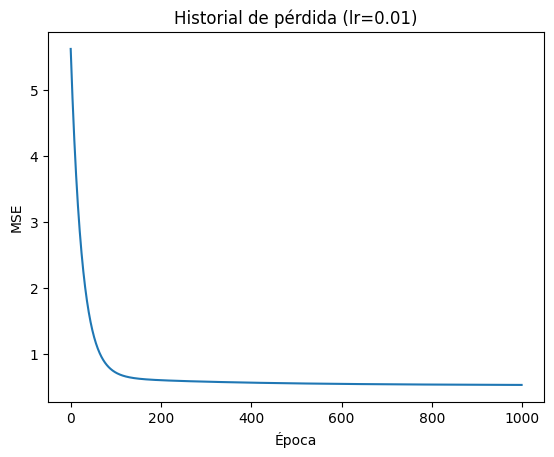

In [ ]:
import matplotlib.pyplot as plt

w, b, historial = entrenar_perceptron(X_train_scaled, y_train, learning_rate=0.01, epochs=1000)

plt.figure()
plt.plot(historial)
plt.xlabel("Época")
plt.ylabel("MSE")
plt.title("Historial de pérdida (lr=0.01)")
plt.show()


Época 0, Pérdida: 5.6280
Época 100, Pérdida: 3.9792
Época 200, Pérdida: 2.8770
Época 0, Pérdida: 5.6280
Época 100, Pérdida: 0.7117
Época 200, Pérdida: 0.5963
Época 0, Pérdida: 5.6280
Época 100, Pérdida: 0.5246
Época 200, Pérdida: 0.5184
Época 0, Pérdida: 5.6280
Época 100, Pérdida: 4239204739546403387264306655727964441348984188889221680195136659906053384233714551082947969024.0000
Época 200, Pérdida: 31138285935086284288948213532119831012785769974149421544278696638132883806867416464167596762633427847931903053280091065792370843650922240421440903032000187436917323955256453298171175015284736.0000


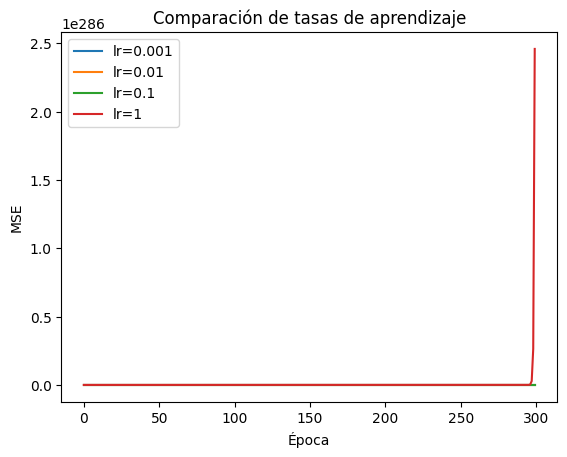

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 1]
historiales = {}

for lr in learning_rates:
    w_lr, b_lr, hist_lr = entrenar_perceptron(X_train_scaled, y_train, learning_rate=lr, epochs=300)
    historiales[lr] = hist_lr

plt.figure()
for lr in learning_rates:
    plt.plot(historiales[lr], label=f"lr={lr}")
plt.xlabel("Época")
plt.ylabel("MSE")
plt.title("Comparación de tasas de aprendizaje")
plt.legend()
plt.show()



3. ¿El modelo convergió? ¿Cómo lo sabe observando la gráfica? (2 pts)

    Converge si la curva de pérdida:

    - desciende de forma sostenida al inicio  
    - y luego se aplana (los cambios entre épocas se vuelven pequeños)

    Eso indica que el gradiente está cerca de 0 y el modelo llegó a una zona de mínimo o lo que es lo mismo, convergencia.

4. Experimente con diferentes tasas de aprendizaje: 0.001, 0.01, 0.1, 1.0. Grafique las 4
curvas de pérdida en un mismo plot. ¿Cuál funciona mejor? ¿Alguna diverge? (4 pts)

    - **0.001:** converge pero muy lento.  

    - **0.01:** normalmente es un buen balance (baja rápido y estable).  

    - **0.1:** puede bajar rápido pero puede oscilar.  

    - **1.0:** frecuentemente diverge (la pérdida se dispara o se vuelve NaN) porque los pasos son demasiado grandes.


M. Evaluación en el conjunto de prueba: (10 puntos)

1. Usando los parámetros w y b entrenados, calcule las predicciones en X_test_scaled.
(2 pts)

2. Calcule el MSE en el conjunto de prueba. ¿Es mayor o menor que el MSE final de
entrenamiento? ¿Qué indica esto sobre la generalización del modelo? (3 pts)

    Esto indica que es una buena generalización ya que la diferecia es poca

3. Cree un scatter plot comparando y_test (eje x) vs predicciones (eje y). Añada una
línea diagonal y = x. ¿Qué tan cerca están los puntos de esta línea ideal? (3 pts)

4. Calcule el coeficiente de determinación R². Interprete el resultado. (2 pts)

In [ ]:
y_test_pred = X_test_scaled @ w + b  # (m_test, 1)
print(y_test_pred.shape)
print(y_test_pred[:5])
print("Valores reales",y_test[:5])


(4128, 1)
[[0.79901169]
 [1.70771125]
 [2.63123279]
 [2.79784693]
 [2.46570822]]
Valores reales [0.477   0.458   5.00001 2.186   2.78   ]


In [ ]:
y_test_col = y_test.reshape(-1, 1)
m_test = X_test_scaled.shape[0]

mse_test = (1/m_test) * np.sum((y_test_pred - y_test_col)**2)
mse_train_final = historial[-1]

print("MSE train final:", mse_train_final)
print("MSE test:", mse_test)


MSE train final: 0.5247756798813749
MSE test: 0.5548428356400756


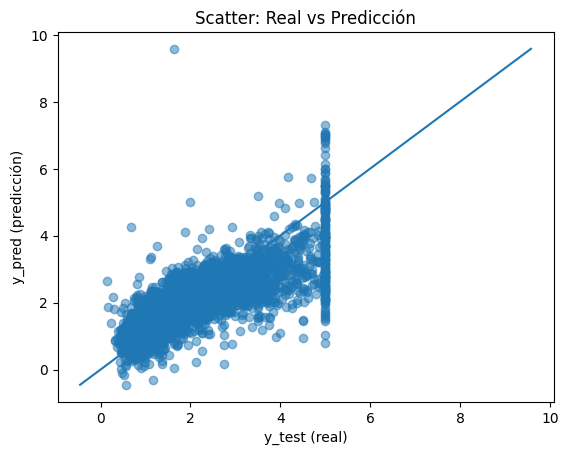

In [ ]:
plt.figure()
plt.scatter(y_test, y_test_pred.flatten(), alpha=0.5)
plt.xlabel("y_test (real)")
plt.ylabel("y_pred (predicción)")
plt.title("Scatter: Real vs Predicción")

minv = min(y_test.min(), y_test_pred.min())
maxv = max(y_test.max(), y_test_pred.max())
plt.plot([minv, maxv], [minv, maxv])  # línea y=x
plt.show()


In [ ]:
SS_res = np.sum((y_test - y_test_pred.flatten())**2)
SS_tot = np.sum((y_test - np.mean(y_test))**2)
R2 = 1 - (SS_res / SS_tot)

print("R2:", R2)


R2: 0.576588038655764


*Bibliografía*
- Libro guía: Inteligencia artificial fundamentos, Alcides Montoya Cañola
- Curso básico de Algebra lineal, segunda edición, Rubén E. Sánchez C. - Antonio Velazco M., Colombia, 1980